In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/data/risk_precision/magData.csv')

In [16]:
import os.path as op
import os

In [117]:
for (sid, run), d in df.iloc[:500].groupby(['subcode', 'run']):
    error = d[d.accuracy == 0].copy()
    error['trial_type'] = 'error'
    error['onset'] = error['responseonset1'] / 1000.
    error['response_time'] = error['rt'] / 1000.
    error['duration'] = 0
    
    stimulations1 = d.copy()
    stimulations1['trial_type'] = stimulations1['sure_bet'].apply(lambda x: 'stim1-{}'.format(x))
    stimulations1['onset'] = stimulations1['stimonset1'] / 1000.
    stimulations1['duration'] = (stimulations1['stimoffset1'] - stimulations1['stimonset1']) / 1000.
    
    stimulations2 = d.copy()
    stimulations2['trial_type'] = stimulations2['prob_bet'].apply(lambda x: 'stim2-{}'.format(x))
    stimulations2['onset'] = stimulations2['stimonset2']  / 1000.
    stimulations2['duration'] = (stimulations2['stimoffset2'] - stimulations2['stimonset2']) / 1000.    

    
    response = d.copy()
    response = response[np.in1d(response.leftright, [-1, 1])]
    response['trial_type'] = response['leftright'].map({-1:'left', 1:'right'})
    response['onset'] = response['responseonset1']  / 1000.
    response['response_time'] = response['rt']  / 1000.
    response['duration'] = 0
    
    
    r = pd.concat((error, stimulations1, stimulations2, response), 
                  ignore_index=True)[['onset', 'duration', 'trial_type', 'response_time']]
    
    path_d = f'/data/risk_precision/ds-numrisk/sub-{sid}/func'
    
    r.to_csv(op.join(path_d, f'sub-{sid}_task-numrisk_run-{run}_events.tsv'), sep='\t', index=False)

        
    

/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [94]:
from nistats.design_matrix import make_first_level_design_matrix

In [95]:
n_frames = 189
tr = 2.827 

In [96]:
import numpy as np

In [97]:
frametimes = np.arange(0, n_frames*tr, tr)

In [103]:
import seaborn as sns

In [105]:
X = make_first_level_design_matrix(frametimes, r[['onset', 'trial_type', 'duration']], drift_model=None)

In [109]:
import matplotlib.pyplot as plt

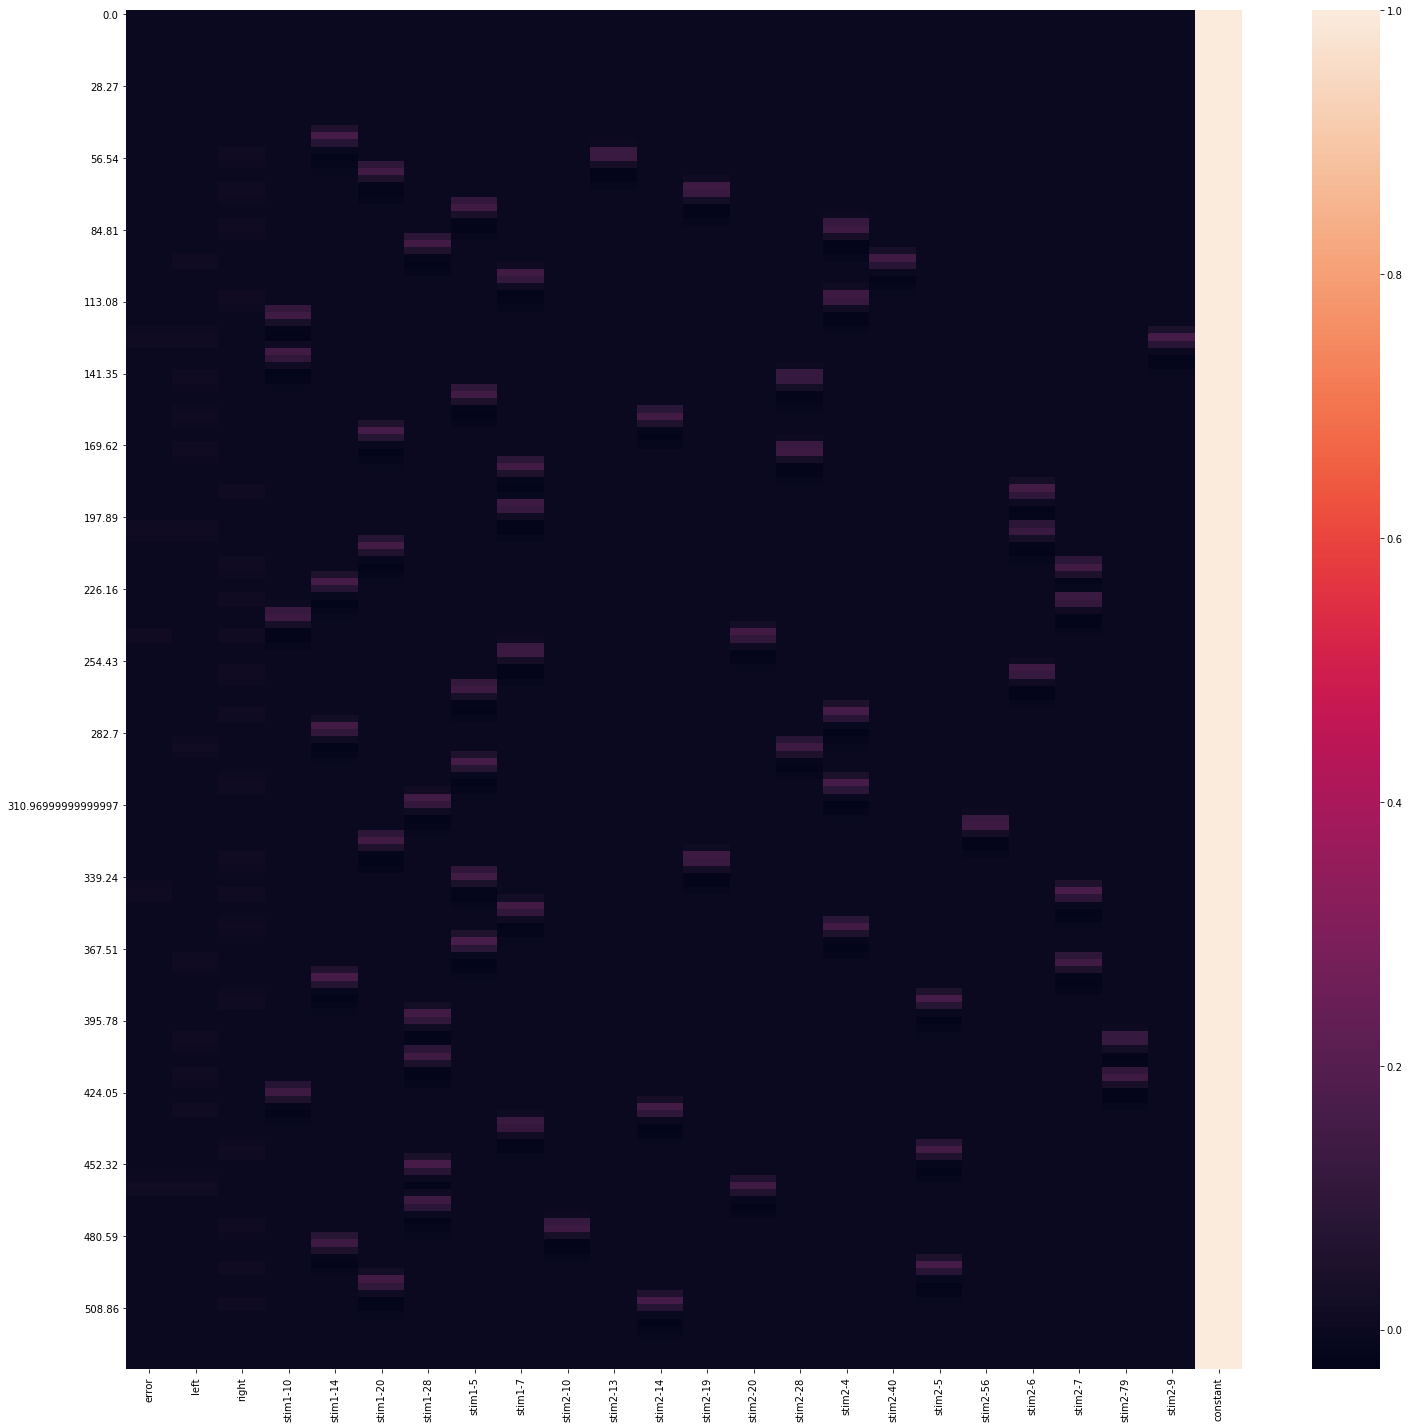

In [110]:
sns.heatmap(X)
plt.gcf().set_size_inches(25, 25)